In [54]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [2]:
df = pd.read_csv("emi_prediction_dataset.csv")
df.head(5)

C:\Users\Sathish Varadharajan\AppData\Local\Temp\ipykernel_12992\3570199468.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("emi_prediction_dataset.csv")


,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


In [3]:
df.shape

(404800, 27)

In [4]:
df.columns

Index(['age', 'gender', 'marital_status', 'education', 'monthly_salary',
       'employment_type', 'years_of_employment', 'company_type', 'house_type',
       'monthly_rent', 'family_size', 'dependents', 'school_fees',
       'college_fees', 'travel_expenses', 'groceries_utilities',
       'other_monthly_expenses', 'existing_loans', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario',
       'requested_amount', 'requested_tenure', 'emi_eligibility',
       'max_monthly_emi'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

In [6]:
df.isna().sum()

age                          0
gender                       0
marital_status               0
education                 2404
monthly_salary               0
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent              2426
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score              2420
bank_balance              2426
emergency_fund            2351
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64

In [7]:
# null values columns
# education                 2404
# monthly_rent              2426
# credit_score              2420
# bank_balance              2426
# emergency_fund            2351

In [8]:
df.describe() 

,years_of_employment,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,current_emi_amount,credit_score,emergency_fund,requested_amount,requested_tenure,max_monthly_emi
count,404800.000000,402374.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,402380.000000,402449.000000,4.048000e+05,404800.000000,404800.000000
mean,5.364079,5828.446490,2.940425,1.940425,4624.575593,4066.253706,5687.497777,12804.999506,7119.309783,4543.407609,700.856223,96769.051731,3.708554e+05,29.126677,6763.602156
std,6.079135,8648.604639,1.075199,1.075199,5061.074401,7319.344289,3392.671132,6993.853745,4510.447300,7034.901139,88.435548,81373.053976,3.451945e+05,18.100854,7741.263317
min,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,600.000000,1800.000000,600.000000,0.000000,0.000000,1400.000000,1.000000e+04,3.000000,500.000000
25%,1.200000,0.000000,2.000000,1.000000,0.000000,0.000000,3200.000000,7700.000000,3800.000000,0.000000,654.000000,38400.000000,1.240000e+05,15.000000,500.000000
50%,3.200000,0.000000,3.000000,2.000000,3000.000000,0.000000,4900.000000,11400.000000,6000.000000,0.000000,701.000000,74000.000000,2.360000e+05,25.000000,4211.200000
75%,7.200000,10600.000000,4.000000,3.000000,9000.000000,6500.000000,7400.000000,16400.000000,9300.000000,8000.000000,748.000000,130600.000000,4.940000e+05,40.000000,9792.000000
max,36.000000,80000.000000,5.000000,4.000000,15000.000000,25000.000000,30300.000000,71200.000000,42900.000000,56300.000000,1200.000000,891500.000000,1.500000e+06,84.000000,91040.400000


In [9]:
def age_type(age):
    age = str(age)
    new_age = ''
    
    for ch in age:
        if ch.isdigit():
            new_age += ch
        if len(new_age) == 2:
            break
    
    return int(new_age)

df['age'] = df['age'].apply(age_type)



In [10]:
df['monthly_salary'] = df['monthly_salary'].astype(str)

# Replace ".0.0" or ".0" ---> ".00"
df['monthly_salary'] = df['monthly_salary'].str.replace('.0.0', '.00', regex=False)
df['monthly_salary'] = df['monthly_salary'].str.replace('.0', '.00', regex=False)

# Convert back to numeric
df['monthly_salary'] = pd.to_numeric(df['monthly_salary'], errors='coerce')


In [11]:
df['bank_balance'] = df['bank_balance'].astype(str)

# Replacing  ".0.0" or ".0" ---> ".00"
df['bank_balance'] = df['bank_balance'].str.replace('.0.0', '.00', regex=False)
df['bank_balance'] = df['bank_balance'].str.replace('.0', '.00', regex=False)

# Convert back to numeric
df['bank_balance'] = pd.to_numeric(df['bank_balance'], errors='coerce')


In [12]:
df['gender'] = df['gender'].replace({'MALE':'Male', 'M': 'Male', 'male':'Male',
                                     'F':'Female', 'female':'Female', 'FEMALE':'Female'})

In [13]:
df.dropna(inplace=True)

In [14]:
df.describe()

,age,monthly_salary,years_of_employment,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,current_emi_amount,credit_score,bank_balance,emergency_fund,requested_amount,requested_tenure,max_monthly_emi
count,392899.000000,392899.000000,392899.000000,392899.000000,392899.00000,392899.00000,392899.000000,392899.000000,392899.000000,392899.000000,392899.000000,392899.000000,392899.000000,3.928990e+05,392899.000000,3.928990e+05,392899.000000,392899.000000
mean,38.877488,59498.624547,5.368834,5827.342918,2.94070,1.94070,4625.387695,4066.852041,5687.161586,12805.942494,7120.359940,4541.927060,700.867241,2.417099e+05,96771.688144,3.709153e+05,29.127822,6765.939973
std,9.300407,43343.845798,6.084231,8646.245400,1.07502,1.07502,5061.094643,7320.204884,3392.866112,6993.387321,4511.036034,7034.481551,88.499348,1.832477e+05,81358.605124,3.451781e+05,18.096444,7746.599576
min,26.000000,3967.000000,0.500000,0.000000,1.00000,0.00000,0.000000,0.000000,600.000000,1800.000000,600.000000,0.000000,0.000000,6.100000e+03,1400.000000,1.000000e+04,3.000000,500.000000
25%,32.000000,35400.000000,1.200000,0.000000,2.00000,1.00000,0.000000,0.000000,3200.000000,7700.000000,3800.000000,0.000000,654.000000,1.044000e+05,38400.000000,1.240000e+05,15.000000,500.000000
50%,38.000000,51700.000000,3.200000,0.000000,3.00000,2.00000,3100.000000,0.000000,4900.000000,11400.000000,6000.000000,0.000000,701.000000,1.960000e+05,74000.000000,2.370000e+05,25.000000,4217.400000
75%,48.000000,73000.000000,7.200000,10600.000000,4.00000,3.00000,9000.000000,6500.000000,7400.000000,16400.000000,9300.000000,8000.000000,748.000000,3.313000e+05,130600.000000,4.950000e+05,40.000000,9792.000000
max,59.000000,499970.000000,36.000000,80000.000000,5.00000,4.00000,15000.000000,25000.000000,30300.000000,71200.000000,42900.000000,56300.000000,1200.000000,1.717300e+06,891500.000000,1.500000e+06,84.000000,91040.400000


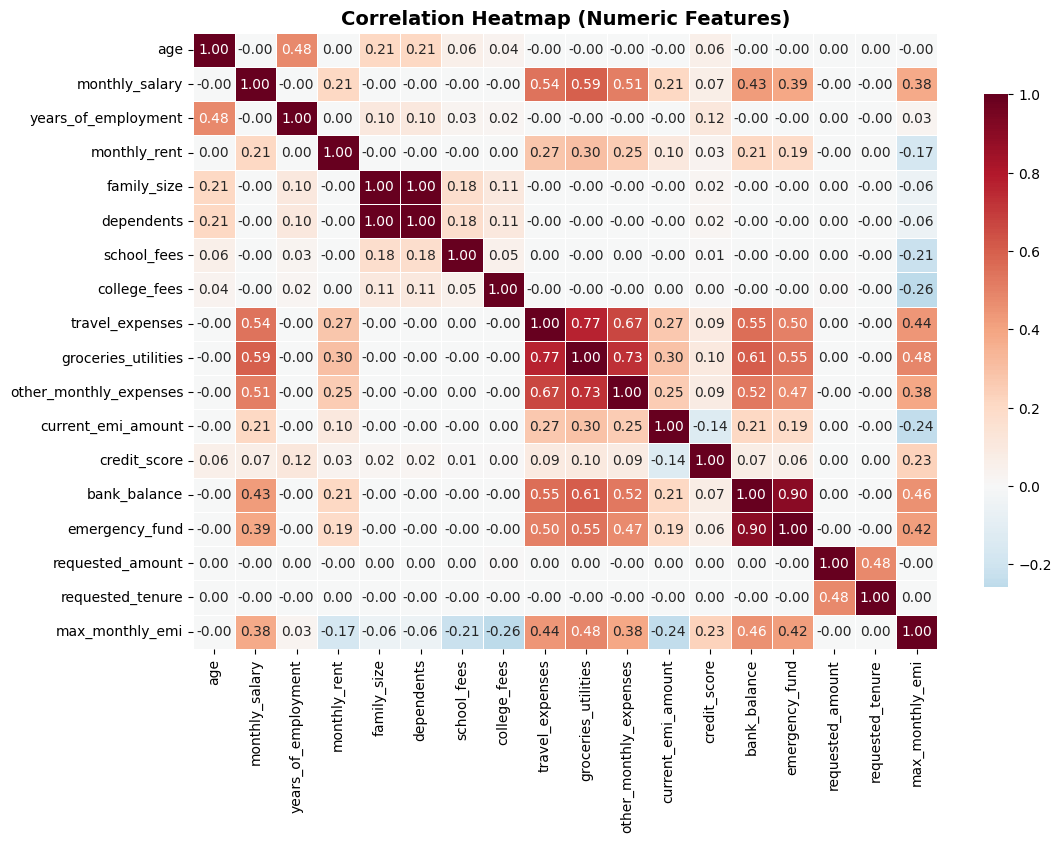

In [15]:

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,          # display correlation values
    fmt=".2f",           # format for values
    cmap="RdBu_r",       # color map (same as in Plotly)
    center=0,            # center the colormap at 0
    linewidths=0.5,      # add lines between cells
    cbar_kws={"shrink": 0.8}  # adjust color bar size
)

# Add title
plt.title("Correlation Heatmap (Numeric Features)", fontsize=14, fontweight='bold')

# Show plot
plt.show()


In [16]:
df.to_csv("cleaned_EMI.csv", index=False)

In [17]:
df1 = pd.read_csv("cleaned_EMI.csv")
df1.head(5)

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


In [18]:

print("df : ",df1.shape)

print("df1 : ",df1.shape)

df :  (392899, 27)
df1 :  (392899, 27)


In [22]:
df.columns

Index(['age', 'gender', 'marital_status', 'education', 'monthly_salary',
       'employment_type', 'years_of_employment', 'company_type', 'house_type',
       'monthly_rent', 'family_size', 'dependents', 'school_fees',
       'college_fees', 'travel_expenses', 'groceries_utilities',
       'other_monthly_expenses', 'existing_loans', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario',
       'requested_amount', 'requested_tenure', 'emi_eligibility',
       'max_monthly_emi'],
      dtype='object')

In [19]:
# predicting max_month by Random forest 

X = df.drop('max_monthly_emi', axis=1)
y = df['max_monthly_emi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:

le = LabelEncoder()
X_train['gender'] = le.fit_transform(X_train['gender'])
X_test['gender'] = le.transform(X_test['gender'])

for col in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


In [25]:
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
y_pred = rf.predict(X_test)

In [27]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("=== Random Forest Regressor Performance ===")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")

=== Random Forest Regressor Performance ===
MAE  : 825.92
RMSE : 1429.47
R²   : 0.97


In [28]:
# Combine actual and predicted values into one DataFrame
comparison = pd.DataFrame({
    'Actual_EMI': y_test.values,
    'Predicted_EMI': y_pred
})

# Display top 10 (or all if you prefer)
print(comparison.head(20))

    Actual_EMI  Predicted_EMI
0        500.0       503.0000
1      37422.0     38253.1780
2       4080.0      5869.1720
3       2485.0      1903.4283
4      22500.0     20426.3100
5        500.0       502.8000
6       7459.2      7753.1440
7        500.0       504.6000
8        500.0       500.0000
9       2240.0      2461.7236
10       500.0       505.5000
11       500.0       500.0000
12      2520.0      2925.9258
13     12342.0     10574.6420
14       500.0       730.6550
15      2065.0      2829.5050
16     13850.0     11169.4000
17       500.0       500.0000
18      7240.0      7392.8680
19      7084.0     10304.6776


In [29]:
# without Hyperparameter tuning
X = df.drop('emi_eligibility', axis=1)
y = df['emi_eligibility']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')

In [31]:
X_train.select_dtypes(include='object').columns


Index(['gender', 'marital_status', 'education', 'employment_type',
       'company_type', 'house_type', 'existing_loans', 'emi_scenario'],
      dtype='object')

In [ ]:

# Create a LabelEncoder instance
le = LabelEncoder()

# Loop through all object columns
for col in X_train.select_dtypes(include='object').columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


In [34]:
X_train.select_dtypes(include='object').columns

Index([], dtype='object')

In [35]:
rf_clf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Eligible       0.93      0.97      0.95     14283
   High_Risk       0.86      0.04      0.07      3454
Not_Eligible       0.96      1.00      0.98     60843

    accuracy                           0.95     78580
   macro avg       0.91      0.67      0.67     78580
weighted avg       0.95      0.95      0.93     78580



In [37]:
print(confusion_matrix(y_test, y_pred))

[[13796    17   470]
 [  929   131  2394]
 [   50     5 60788]]


In [ ]:
# y_train / y_test  using a dedicated encoder

le_target = LabelEncoder()
y_train = le_target.fit_transform(y_train)
y_test = le_target.transform(y_test)

In [ ]:
#Train

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

In [ ]:
# decoding using the same target encoder

y_pred_labels = le_target.inverse_transform(y_pred)
y_test_labels = le_target.inverse_transform(y_test)


In [ ]:
# comparing results

comparison = pd.DataFrame({
    'Actual': y_test_labels,
    'Predicted': y_pred_labels
})
print(comparison.head(30))


          Actual     Predicted
0   Not_Eligible  Not_Eligible
1       Eligible      Eligible
2   Not_Eligible  Not_Eligible
3   Not_Eligible  Not_Eligible
4   Not_Eligible  Not_Eligible
5   Not_Eligible  Not_Eligible
6   Not_Eligible  Not_Eligible
7   Not_Eligible  Not_Eligible
8   Not_Eligible  Not_Eligible
9   Not_Eligible  Not_Eligible
10  Not_Eligible  Not_Eligible
11  Not_Eligible  Not_Eligible
12  Not_Eligible  Not_Eligible
13  Not_Eligible  Not_Eligible
14  Not_Eligible  Not_Eligible
15  Not_Eligible  Not_Eligible
16  Not_Eligible  Not_Eligible
17  Not_Eligible  Not_Eligible
18  Not_Eligible  Not_Eligible
19  Not_Eligible  Not_Eligible
20  Not_Eligible  Not_Eligible
21  Not_Eligible  Not_Eligible
22  Not_Eligible  Not_Eligible
23  Not_Eligible  Not_Eligible
24  Not_Eligible  Not_Eligible
25  Not_Eligible  Not_Eligible
26     High_Risk  Not_Eligible
27  Not_Eligible  Not_Eligible
28  Not_Eligible  Not_Eligible
29      Eligible      Eligible


In [45]:
# predict emi_eligibility  - Linear Regression

X = df.drop('max_monthly_emi', axis=1)
y = df['max_monthly_emi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()

In [48]:
X_train.select_dtypes(include='object').columns



Index([], dtype='object')

In [49]:
# Convert categorical columns into dummy/indicator variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [50]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [51]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
y_pred = lr.predict(X_test)
pd.DataFrame({"Actual":y_test.values, "Predicted":y_pred})

,Actual,Predicted
0,500.0,662.622373
1,37422.0,26130.744198
2,4080.0,6629.652840
3,2485.0,2917.542988
4,22500.0,16875.085657
...,...,...
78575,500.0,-2335.442241
78576,5450.0,8393.102680
78577,500.0,-2551.093929
78578,1830.4,6950.233367


In [53]:
print ("mse:",mean_squared_error(y_test, y_pred))
print ("rmse:",np.sqrt(mean_squared_error(y_test, y_pred)))
print ("r2_score:",r2_score(y_test, y_pred))
print ("mape:",mean_absolute_percentage_error(y_test, y_pred))

mse: 14823741.590106718
rmse: 3850.16124209191
r2_score: 0.751158310634364
mape: 1.683657014128094


In [57]:
#  predict emi_eligibility - Logistic Regression

# Separate features and target
X = df.drop("emi_eligibility", axis=1)
y = df["emi_eligibility"]

# Encode all categorical columns automatically
le = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object':      # check if column contains strings
        X[col] = le.fit_transform(X[col])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
log = LogisticRegression(solver='saga', penalty='l2', C=0.1, class_weight='balanced', max_iter=1000)
log.fit(X_train, y_train)

c:\Users\Sathish Varadharajan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'saga'
,max_iter,1000
,multi_class,'deprecated'


In [58]:
y_pred = log.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Eligible       0.80      0.72      0.76     14283
   High_Risk       0.15      0.62      0.24      3454
Not_Eligible       0.99      0.83      0.90     60843

    accuracy                           0.80     78580
   macro avg       0.65      0.72      0.63     78580
weighted avg       0.92      0.80      0.85     78580



In [62]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# -------------------------------
# STEP 1: Encode categorical columns
# -------------------------------
df_encoded = df.copy()

# Encode all object (string) columns
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# -------------------------------
# STEP 2: Define Features and Target
# -------------------------------
X = df_encoded.drop('max_monthly_emi', axis=1)
y = df_encoded['max_monthly_emi']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# STEP 3: Set MLflow Experiment
# -------------------------------
mlflow.set_experiment("EMI Prediction Experiment")

with mlflow.start_run(run_name="Linear Regression without Tuning"):

    # --- Train Linear Regression ---
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # --- Make Predictions ---
    y_pred = lr.predict(X_test)

    # --- Evaluate Metrics ---
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # --- Log Parameters and Metrics ---
    mlflow.log_param("model_type", "Linear Regression (no tuning)")
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2_score", r2)
    mlflow.log_metric("mape", mape)

    # --- Log Model ---
    mlflow.sklearn.log_model(lr, "linear_regression_model")

    # --- Print Results ---
    print("\nModel Performance Metrics:")
    print(f"MSE   : {mse:.2f}")
    print(f"RMSE  : {rmse:.2f}")
    print(f"R²    : {r2:.2f}")
    print(f"MAPE  : {mape:.4f}")

# -------------------------------
# STEP 4: Compare Actual vs Predicted
# -------------------------------
comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})
print("\nSample Predictions:")
print(comparison.head(10))


2025/11/06 22:12:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/06 22:12:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Model Performance Metrics:
MSE   : 14823741.59
RMSE  : 3850.16
R²    : 0.75
MAPE  : 1.6837

Sample Predictions:
    Actual     Predicted
0    500.0    662.622373
1  37422.0  26130.744198
2   4080.0   6629.652840
3   2485.0   2917.542988
4  22500.0  16875.085657
5    500.0   7621.962966
6   7459.2   8286.044021
7    500.0    105.564101
8    500.0    876.261592
9   2240.0   3413.479618


In [65]:
# MLflow + Linear Regression with HyperParameter Tuning (Gradient Descent + Regularization)

import mlflow
import mlflow.sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import pandas as pd
import numpy as np

# -------------------------------
# STEP 1: Encode categorical columns
# -------------------------------
df_encoded = df.copy()

for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# -------------------------------
# STEP 2: Define Features and Target
# -------------------------------
X = df_encoded.drop('max_monthly_emi', axis=1)
y = df_encoded['max_monthly_emi']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# STEP 3: Feature Scaling
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# STEP 4: Set MLflow Experiment
# -------------------------------
mlflow.set_experiment("EMI Prediction Experiment")

with mlflow.start_run(run_name="Linear Regression with HyperParameter Tuning"):
    
    # --- Train Linear Regression using SGD ---
    lr_scaled = SGDRegressor(
        max_iter=1000, 
        tol=1e-3, 
        penalty='l2',           # Regularization
        alpha=0.0001,           # Regularization strength
        learning_rate='invscaling',
        eta0=0.01,              # Initial learning rate
        random_state=42
    )
    
    lr_scaled.fit(X_train_scaled, y_train)
    
    # --- Predict ---
    y_pred_scaled = lr_scaled.predict(X_test_scaled)
    
    # --- Calculate Metrics ---
    mse = mean_squared_error(y_test, y_pred_scaled)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_scaled)
    mape = mean_absolute_percentage_error(y_test, y_pred_scaled)
    
    # --- Log Parameters ---
    mlflow.log_param("model_type", "Linear Regression with Gradient Descent + Regularization")
    mlflow.log_param("learning_rate", "invscaling")
    mlflow.log_param("alpha_L2_strength", 0.0001)   # ✅ fixed parameter name
    mlflow.log_param("eta0", 0.01)
    
    # --- Log Metrics ---
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2_score", r2)
    mlflow.log_metric("mape", mape)
    
    # --- Log Model ---
    mlflow.sklearn.log_model(lr_scaled, "linear_regression_sgd_model")
    
    # --- Print Results ---
    print("\nModel Performance Metrics:")
    print(f"MSE   : {mse:.2f}")
    print(f"RMSE  : {rmse:.2f}")
    print(f"R²    : {r2:.2f}")
    print(f"MAPE  : {mape:.4f}")

# -------------------------------
# STEP 5: Compare Actual vs Predicted
# -------------------------------
comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred_scaled
})
print("\nSample Predictions:")
print(comparison.head(10))



2025/11/06 22:17:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/06 22:17:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Model Performance Metrics:
MSE   : 14923996.22
RMSE  : 3863.16
R²    : 0.75
MAPE  : 1.6491

Sample Predictions:
    Actual     Predicted
0    500.0    437.641221
1  37422.0  25301.902333
2   4080.0   6856.778243
3   2485.0   2964.719462
4  22500.0  16257.021831
5    500.0   7257.402371
6   7459.2   8404.243377
7    500.0     40.068107
8    500.0    518.771156
9   2240.0   3715.929356


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392899 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     392899 non-null  int64  
 1   gender                  392899 non-null  object 
 2   marital_status          392899 non-null  object 
 3   education               392899 non-null  object 
 4   monthly_salary          392899 non-null  float64
 5   employment_type         392899 non-null  object 
 6   years_of_employment     392899 non-null  float64
 7   company_type            392899 non-null  object 
 8   house_type              392899 non-null  object 
 9   monthly_rent            392899 non-null  float64
 10  family_size             392899 non-null  int64  
 11  dependents              392899 non-null  int64  
 12  school_fees             392899 non-null  float64
 13  college_fees            392899 non-null  float64
 14  travel_expenses         3